# 📘 Lasso and Ridge Regression

## 🔍 What Are They?

**Lasso** and **Ridge** regression are two types of **regularized linear regression** techniques that help prevent **overfitting** by adding a penalty term to the loss function.

---

## 🔢 Linear Regression Recap

The goal is to minimize the residual sum of squares:

\[
\text{Cost Function} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\]

---

## 🧮 Ridge Regression (L2 Regularization)

### ➕ Adds Penalty:
\[
\text{Cost Function} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
\]

### ✅ Key Features:
- Penalizes large coefficients.
- Shrinks coefficients toward zero, but **never exactly zero**.
- Useful when **all features are important**.
- Prevents multicollinearity.

---

## 🧮 Lasso Regression (L1 Regularization)

### ➕ Adds Penalty:
\[
\text{Cost Function} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
\]

### ✅ Key Features:
- Can shrink some coefficients **exactly to zero**.
- Performs **feature selection**.
- Useful when **some features are irrelevant**.

---

## ⚖️ Difference Between Lasso and Ridge

| Feature               | Ridge (L2)     | Lasso (L1)      |
|------------------------|----------------|------------------|
| Penalty Type           | Squares of weights | Absolute values of weights |
| Coefficients Shrinkage | Yes            | Yes              |
| Can Zero Coefficients? | ❌ No          | ✅ Yes           |
| Use Case               | Many small/medium effects | Sparse models with fewer features |

---

## 🧪 When to Use?

- **Ridge**: Many predictors with small effects; multicollinearity exists.
- **Lasso**: Few important predictors; automatic feature selection needed.

---

## 🧠 Tips

- Tune the **alpha (λ)** parameter using cross-validation.
- Use `RidgeCV` or `LassoCV` in `scikit-learn` for automatic tuning.
- Combine both using **Elastic Net** when needed.

---

## 📦 scikit-learn Implementation

```python
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv(r"/kaggle/input/housesalesprediction/kc_house_data.csv")
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
dataset = dataset[[
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'condition',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'price'
]]

In [5]:
dataset

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,538000.0
2,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,1530,0,2009,0,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,2310,0,2014,0,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,1020,0,2009,0,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,1600,0,2004,0,400000.0


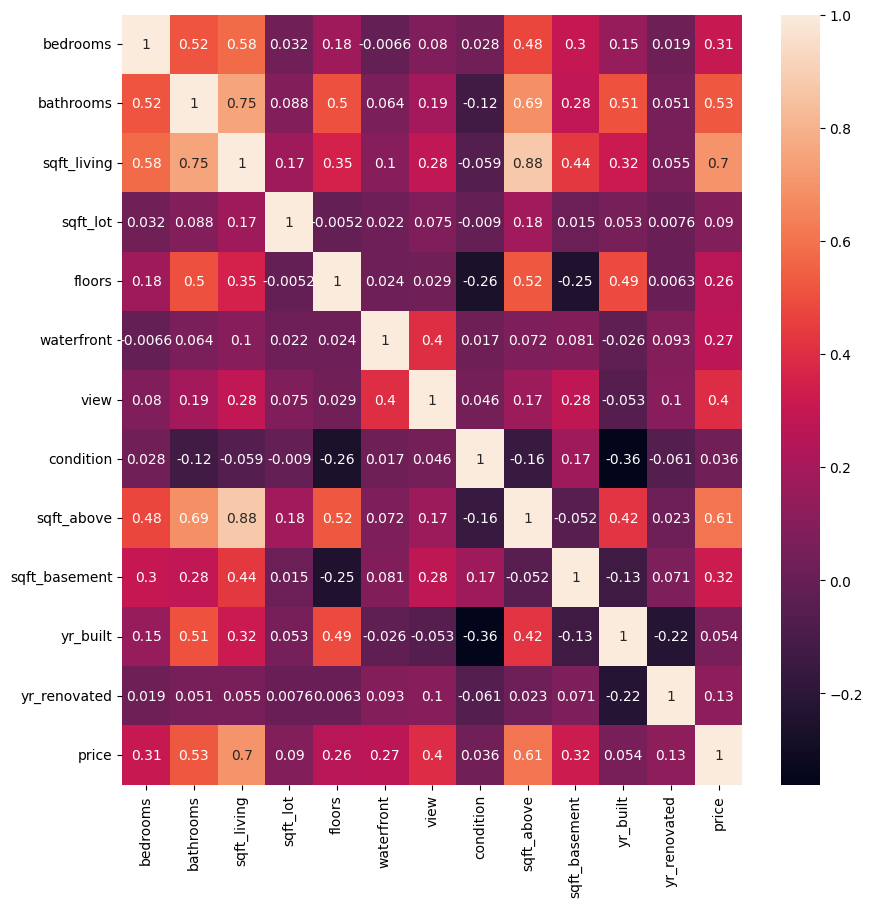

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split

In [8]:
x = dataset.iloc[:,:-1]
y = dataset["price"]
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [10]:
sc.fit(x)
sc.transform(x)
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [11]:

x = pd.DataFrame(sc.transform(x),columns=x.columns)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.734708,-0.658681,-0.544898,-0.210128
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,0.460841,0.245141,-0.681079,4.746678
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.229834,-0.658681,-1.293892,-0.210128
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.891699,1.397515,-0.204446,-0.210128
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,-0.130895,-0.658681,0.544548,-0.210128
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,-0.312039,-0.658681,1.293542,-0.210128
21609,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.629908,-0.658681,1.463768,-0.210128
21610,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.927928,-0.658681,1.293542,-0.210128
21611,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,-0.227505,-0.658681,1.123316,-0.210128


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np


# LinearRegression

In [14]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

59.880151206213924

In [15]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_absolute_error(y_test,lr.predict(x_test))))

60651868368.86792
158276.98831495046
397.8404055836341


In [16]:
lr.coef_

array([-51407.40430126,  50468.64812538, 128800.33037587, -15227.96869714,
        24778.37903662,  43709.20764709,  47825.93074542,  10951.47998695,
       117875.62902094,  46735.00332943, -85512.94649764,   4745.13582418])

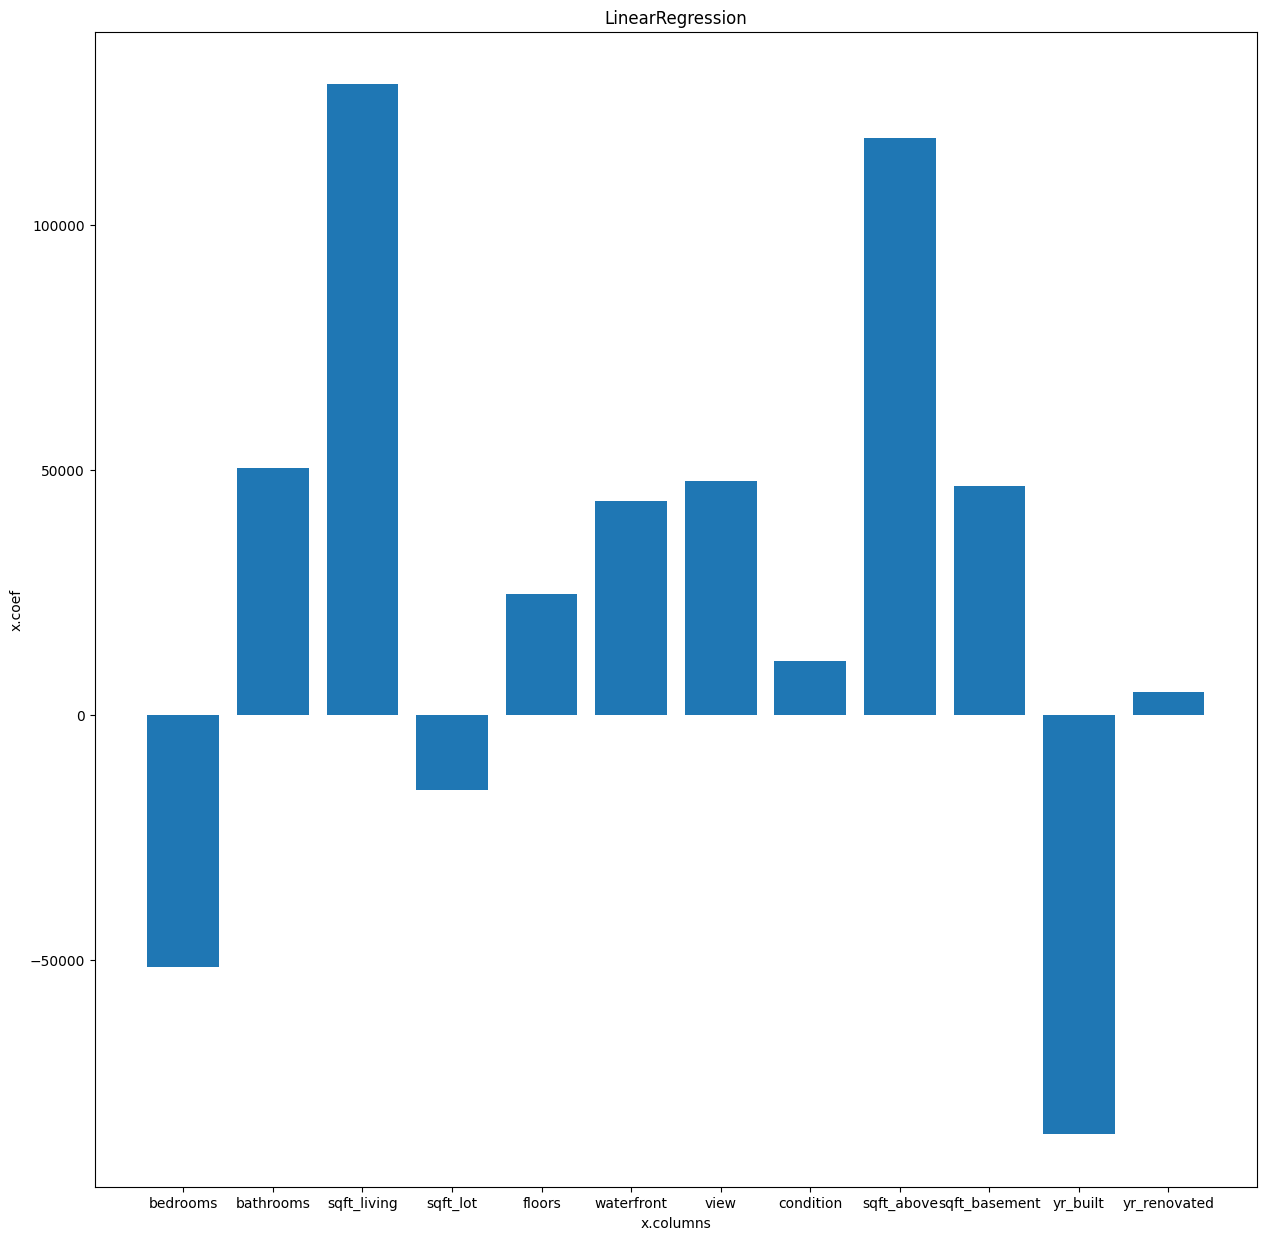

In [17]:
plt.figure(figsize=(15,15))
plt.bar(x.columns,lr.coef_)
plt.title("LinearRegression")
plt.xlabel("x.columns")
plt.ylabel("x.coef")
plt.show()

# Lasso 

In [18]:
la = Lasso(alpha=0.5)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.543e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


59.880162245233315

In [19]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_absolute_error(y_test,la.predict(x_test))))

60651851680.441345
158277.01836688575
397.8404433524648


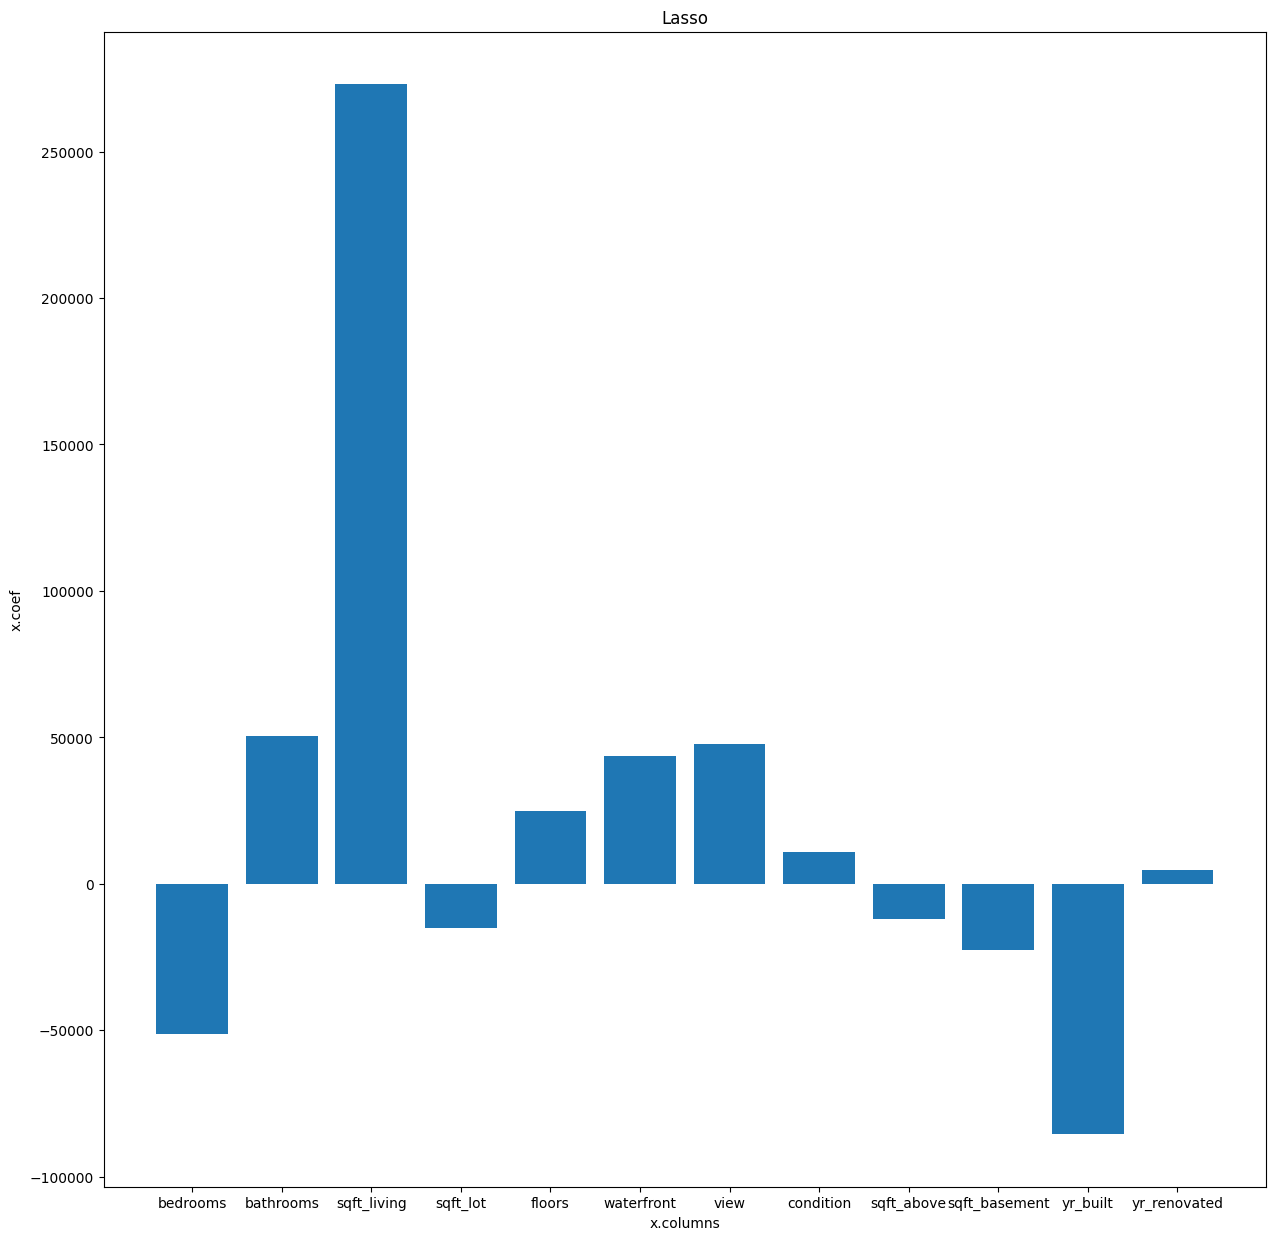

In [20]:
plt.figure(figsize=(15,15))
plt.bar(x.columns,la.coef_)
plt.title("Lasso")
plt.xlabel("x.columns")
plt.ylabel("x.coef")
plt.show()

# Ridge 

In [21]:
ri = Ridge()
ri.fit(x_train,y_train)
ri.score(x_test,y_test)

0.5988011045249473

In [22]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_absolute_error(y_test,ri.predict(x_test))))

60651929979.00073
158275.7247356605
397.83881753250336


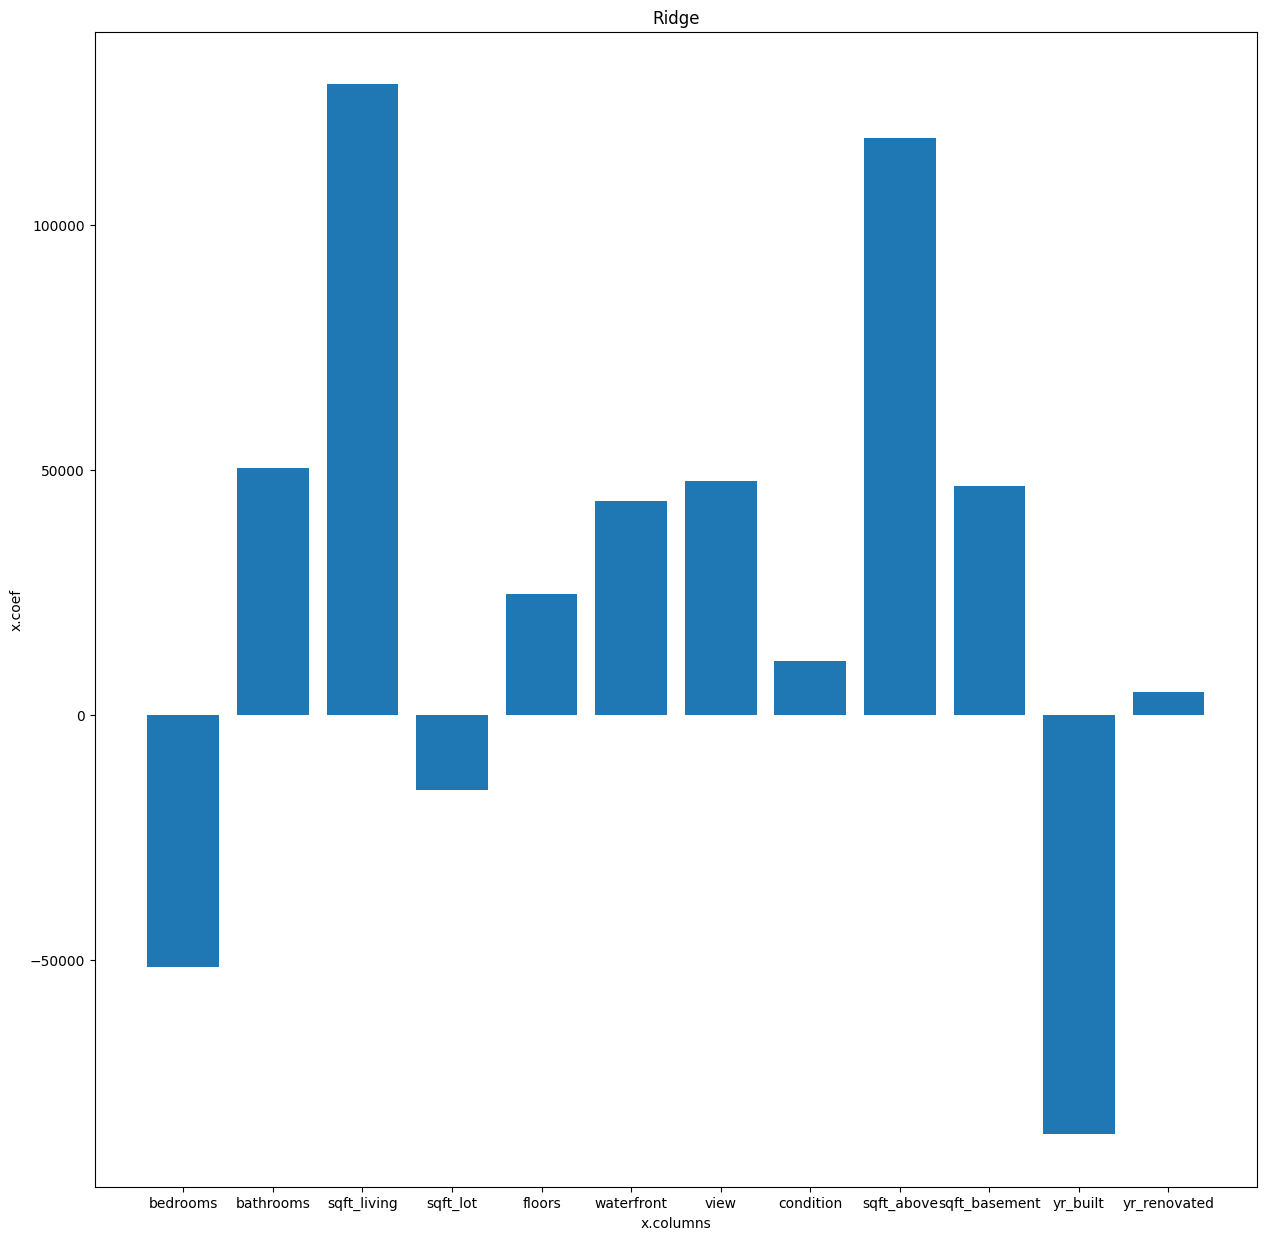

In [23]:
plt.figure(figsize=(15,15))
plt.bar(x.columns,ri.coef_)
plt.title("Ridge")
plt.xlabel("x.columns")
plt.ylabel("x.coef")
plt.show()

In [24]:
df = pd.DataFrame({"col_name":x.columns,"LinearRegrerssion":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})
df

,col_name,LinearRegrerssion,Lasso,Ridge
0,bedrooms,-51407.404301,-51406.779468,-51395.603837
1,bathrooms,50468.648125,50465.379292,50466.784816
2,sqft_living,128800.330376,273073.093865,128791.368507
3,sqft_lot,-15227.968697,-15227.311934,-15224.515391
4,floors,24778.379037,24778.680544,24777.465237
5,waterfront,43709.207647,43708.882753,43707.650862
6,view,47825.930745,47825.738055,47827.786907
7,condition,10951.479987,10950.937485,10952.983502
8,sqft_above,117875.629021,-12202.820716,117866.766860
9,sqft_basement,46735.003329,-22784.889587,46732.987236
